### About The Dataset

#### When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel. 

### Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [24]:
df = pd.read_csv("Advertising.csv")
df.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### Lets drop the column Unnamed: 0 as it is just like the index

In [25]:
df = df.drop('Unnamed: 0',axis=1)
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


#### Checking for null values

In [26]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

#### The dataset doesn't have any null values

In [27]:
df.shape

(200, 4)

#### The dataset have 200 rows and 4 columns

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### All the columns are of float datatype

### EDA

#### Checking the relationship of feature variables with target variable

<AxesSubplot:xlabel='TV', ylabel='sales'>

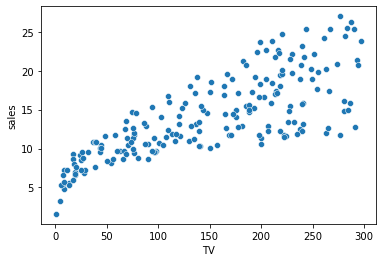

In [29]:
sns.scatterplot(x='TV',y='sales',data=df)

#### TV seems to have a linear relationship with sales, i.e as ads on TV increases sales also goes up

<AxesSubplot:xlabel='radio', ylabel='sales'>

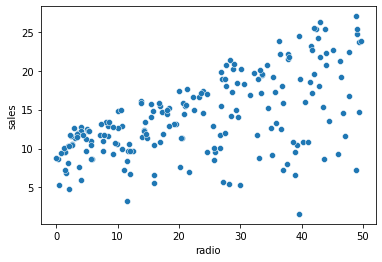

In [30]:
sns.scatterplot(x='radio',y='sales',data=df)

#### The number of ads on radio doesn't seems to have much impact on sales eventhough even can consider it as linear

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

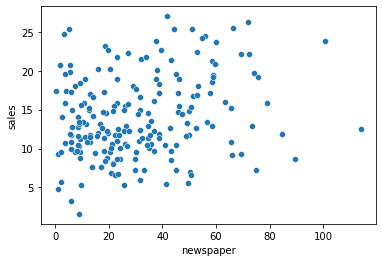

In [31]:
sns.scatterplot(x='newspaper',y='sales',data=df)

#### Newspaper doesn't have a major role in increasing sales

### Correlation

In [32]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


#### TV is having the highest correlation with sales followed by radio and newspaper

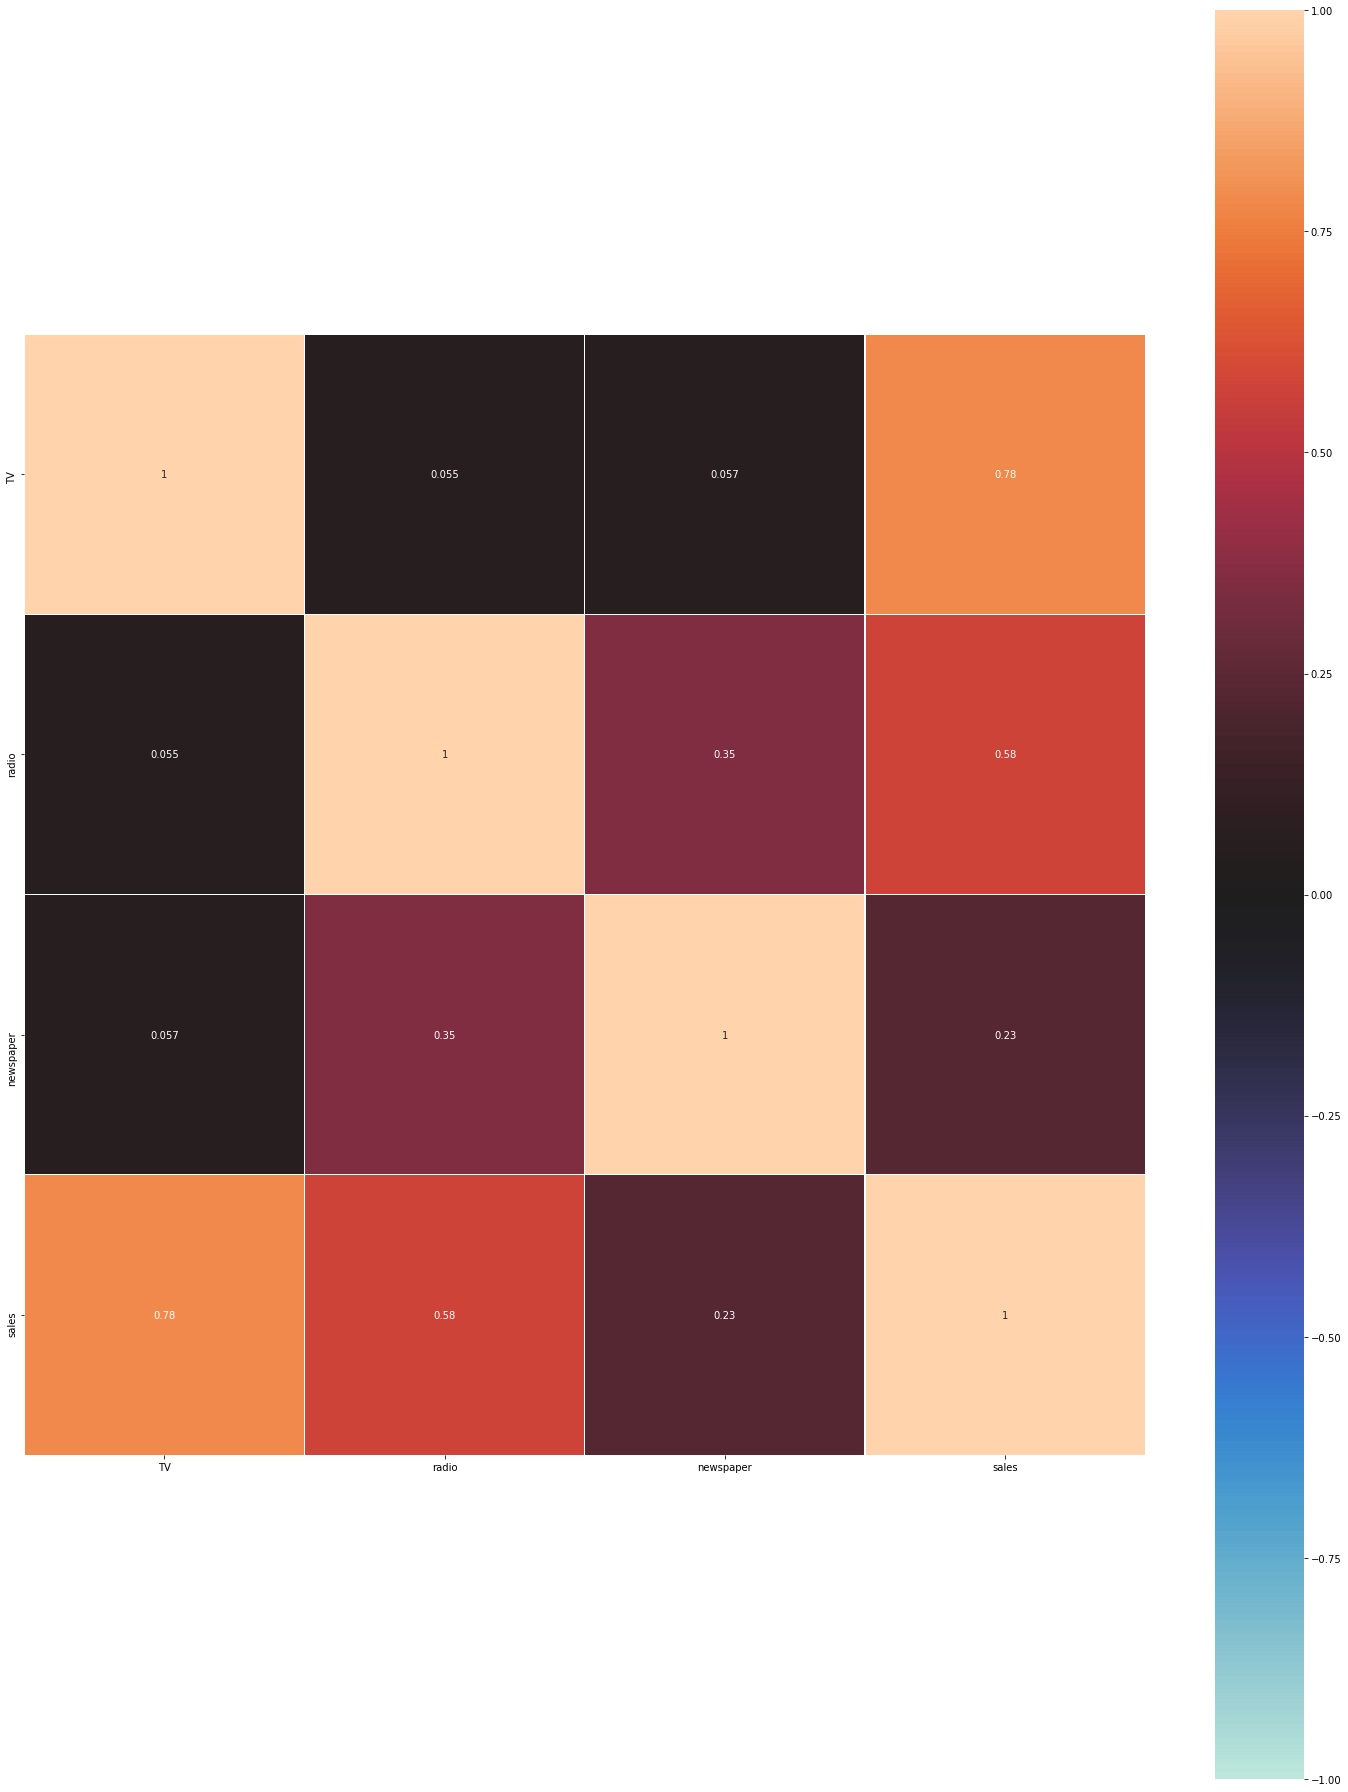

In [33]:
#Visualizing
df_corr = df.corr().abs()
plt.figure(figsize=(20,25))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square = True,center=0,fmt='.2g',linewidth=.2)
plt.tight_layout()

#### Statistical Analysis of the dataset

In [34]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Checking for outliers

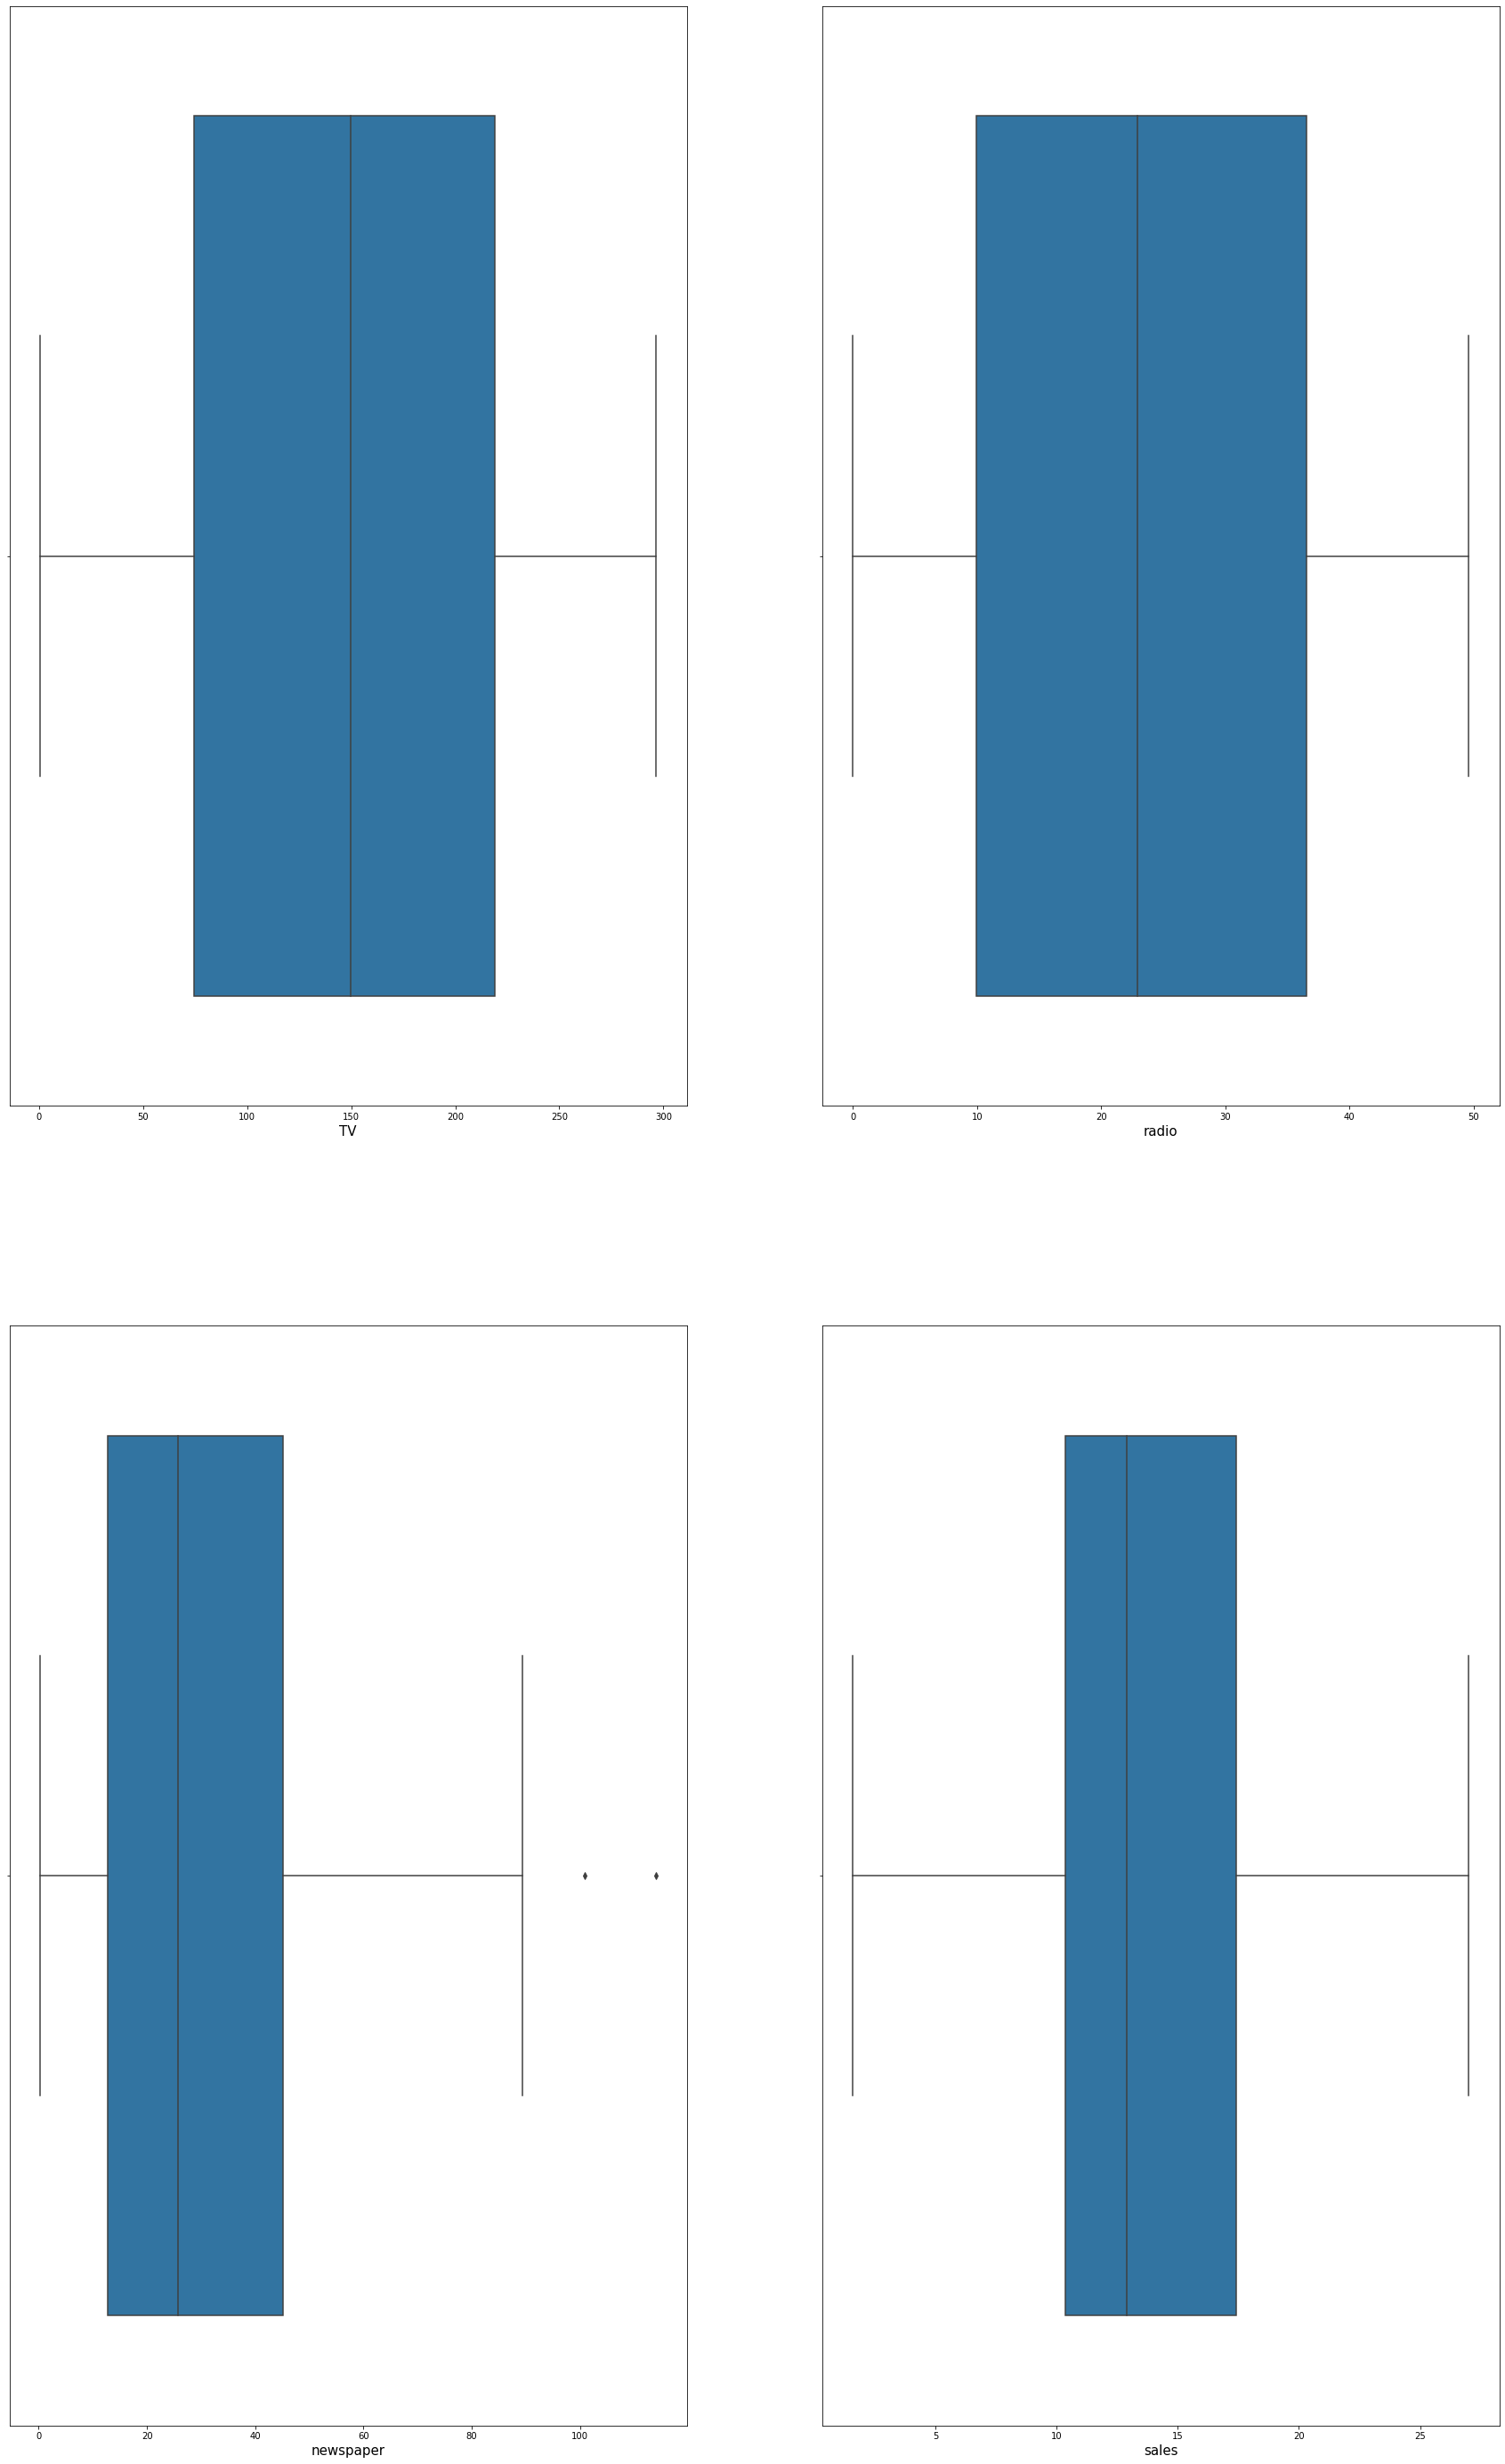

In [35]:
plt.figure(figsize=(30,50))
gr = 1
for column in df:
    if gr<=4:
        ax = plt.subplot(2,2,gr)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### The feature variable 'newspaper' have outliers

#### Skewness checking

In [36]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

#### newspaper seems to be skewed

### Visualizing the data distribution

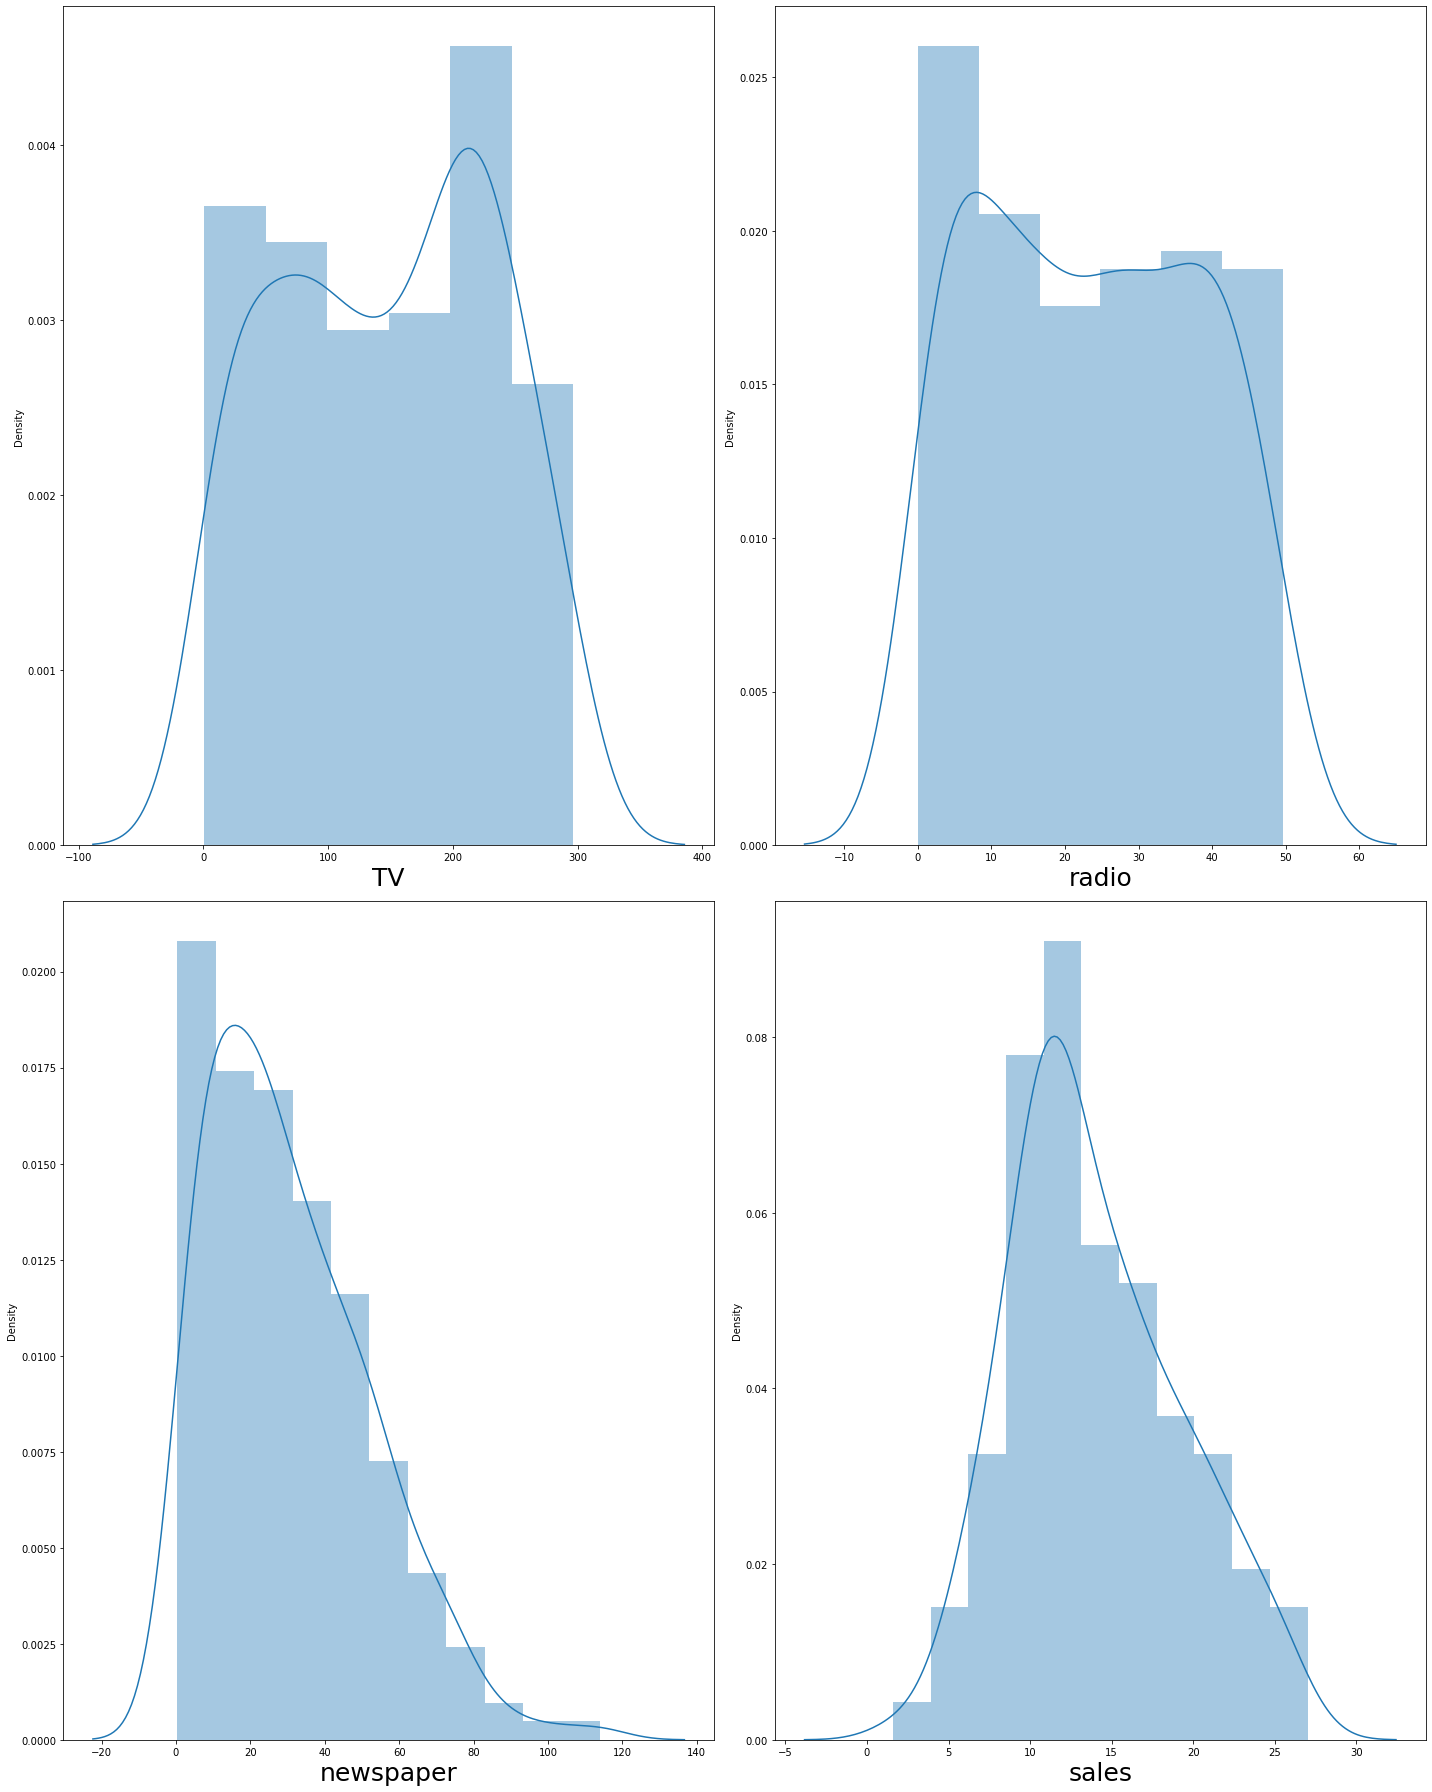

In [37]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### The data is seems to be normally distributed except newspaper

### Data Cleaning

### Outliers Removal

In [38]:
z = np.abs(zscore(df))
print("Old shape : ",z.shape)
print(z)
print("Row numbers : ",np.where(z>3)[0])
print("Column numbers : ",np.where(z>3)[0])
index = np.where(z>3)[0]
df1 = df.drop(df.index[index])
print("New shape : ",df1.shape)

Old shape :  (200, 4)
[[9.69852266e-01 9.81522472e-01 1.77894547e+00 1.55205313e+00]
 [1.19737623e+00 1.08280781e+00 6.69578760e-01 6.96046111e-01]
 [1.51615499e+00 1.52846331e+00 1.78354865e+00 9.07405869e-01]
 [5.20496822e-02 1.21785493e+00 1.28640506e+00 8.60330287e-01]
 [3.94182198e-01 8.41613655e-01 1.28180188e+00 2.15683025e-01]
 [1.61540845e+00 1.73103399e+00 2.04592999e+00 1.31091086e+00]
 [1.04557682e+00 6.43904671e-01 3.24708413e-01 4.27042783e-01]
 [3.13436589e-01 2.47406325e-01 8.72486994e-01 1.58039455e-01]
 [1.61657614e+00 1.42906863e+00 1.36042422e+00 1.77205942e+00]
 [6.16042873e-01 1.39530685e+00 4.30581584e-01 6.57617064e-01]
 [9.45155670e-01 1.17923146e+00 2.92486143e-01 1.04190753e+00]
 [7.90028350e-01 4.96973404e-02 1.22232878e+00 6.48970529e-01]
 [1.43908760e+00 7.99208859e-01 1.62704048e+00 9.26620392e-01]
 [5.78501712e-01 1.05768905e+00 1.07502697e+00 8.30547775e-01]
 [6.66253447e-01 6.50657027e-01 7.11007392e-01 9.56402904e-01]
 [5.64664612e-01 1.65000572e+00 1

#### we have just loss 2 rows after outlier removal

#### Splitting the dataset into feature varibales and target variable

In [39]:
x = df.drop('sales',axis=1)
y = df['sales']

#### Removing skewness

In [40]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

#### checking skewness again

In [41]:
x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

#### skewness is removed

### Scaling the data

In [42]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x_new)

#### Finding the best random state

In [45]:
max_score = 0
max_rs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    score = lr.score(x_train,y_train)
    if score>max_score:
        max_score = score
        max_rs = i
print("Maximum score is",max_score,"when",max_rs,"is the random state")

Maximum score is 0.9287275591854938 when 49 is the random state


#### 49 is the best random state

### MODEL TRAINING

#### i) Linear Regression

In [46]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Score in training dataset = ",lr.score(x_train,y_train))
print("Score in testing dataset = ",lr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred))
print("MSE is :",mean_squared_error(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

Score in training dataset =  0.9040354538749817
Score in testing dataset =  0.9136903047403764
MAE is :  1.164891168959542
MSE is : 1.9763484021124689
RMSE is : 1.4058265903419485


#### LinearRegression model works with an efficiency of 91.37%

#### ii) DecisionTreeRegressor

In [47]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Score in training dataset is ",dt.score(x_train,y_train))
print("Score in testing dataset is ",dt.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_dt))
print("MSE is :",mean_squared_error(y_test,y_pred_dt))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_dt)))

Score in training dataset is  1.0
Score in testing dataset is  0.9571671932842631
MAE is :  0.74
MSE is : 0.9808000000000002
RMSE is : 0.9903534722511959


#### DecisionTreeRegressor works with an efficiency of 95.72%

#### iii) RandomForestRegressor

In [49]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score in training dataset is ",rf.score(x_train,y_train))
print("Score in testing dataset is ",rf.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_rf))
print("MSE is :",mean_squared_error(y_test,y_pred_rf))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Score in training dataset is  0.9970334080789993
Score in testing dataset is  0.9797452260286512
MAE is :  0.5490999999999997
MSE is : 0.46380061999999883
RMSE is : 0.6810290889528867


#### RandomForestRegressor works with an efficiency of 97.97%

#### iv) GradientBoostingRegressor

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
print("Score in training dataset is ",gbr.score(x_train,y_train))
print("Score in training dataset is ",gbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_gbr))
print("MSE is :",mean_squared_error(y_test,y_pred_gbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

Score in training dataset is  0.9987124808655975
Score in training dataset is  0.9830224288067543
MAE is :  0.48546497893165536
MSE is : 0.38875812964686246
RMSE is : 0.6235047150157427


#### GradientBoostingRegressor works with an efficiency of 98.30%

#### v) SVR

In [53]:
svr = SVR()
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)
print("Score in training dataset is ",svr.score(x_train,y_train))
print("Score in training dataset is ",svr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_svr))
print("MSE is :",mean_squared_error(y_test,y_pred_svr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_svr)))

Score in training dataset is  0.9208398874865238
Score in training dataset is  0.9487660475887703
MAE is :  0.7287988588962095
MSE is : 1.1731722569203482
RMSE is : 1.0831307663067964


#### SVR works with an accuracy of 94.88%

#### vi) XGBRegressor

In [54]:
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)
y_pred_xgbr = xgbr.predict(x_test)
print("Score in training dataset is ",xgbr.score(x_train,y_train))
print("Score in training dataset is ",xgbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_xgbr))
print("MSE is :",mean_squared_error(y_test,y_pred_xgbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))

Score in training dataset is  0.9999999334292545
Score in training dataset is  0.978882708962262
MAE is :  0.5168072204589843
MSE is : 0.48355082559191265
RMSE is : 0.6953781888957351


#### XGBRegressor works with an efficiency of 97.89%

#### vii) KNNRegressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print("Score in training dataset is ",knn.score(x_train,y_train))
print("Score in training dataset is ",knn.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_knn))
print("MSE is :",mean_squared_error(y_test,y_pred_knn))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_knn)))

Score in training dataset is  0.9552753834954458
Score in training dataset is  0.9464960248639901
MAE is :  0.8656
MSE is : 1.2251520000000002
RMSE is : 1.1068658455296199


#### KNNRegressor works with an efficiency of 94.65%

#### Finding cross-validation score

In [58]:
cvs = cross_val_score(lr,x_scaled,y,cv=10,scoring='r2')
cvs = np.mean(cvs)
print("Cross validation score of Linear Regression model is : ",cvs)

Cross validation score of Linear Regression model is :  0.8967491708571848


In [57]:
cvs = cross_val_score(dt,x_scaled,y,cv=10)
cvs = np.mean(cvs)
print("Cross validation score of Decision tree model is : ",cvs)

Cross validation score of Decision tree model is :  0.953015082494397


In [60]:
cvs = cross_val_score(rf,x_scaled,y,cv=10)
cvs = np.mean(cvs)
print("Cross validation score of RandomForestRegressor model is : ",cvs)

Cross validation score of RandomForestRegressor model is :  0.9787676649932722


In [61]:
cvs = cross_val_score(gbr,x_scaled,y,cv=10)
cvs = np.mean(cvs)
print("Cross validation score of GradientBoostingRegressor model is : ",cvs)

Cross validation score of GradientBoostingRegressor model is :  0.9813209065135124


In [62]:
cvs = cross_val_score(svr,x_scaled,y,cv=10)
cvs = np.mean(cvs)
print("Cross validation score of SVR model is : ",cvs)

Cross validation score of SVR model is :  0.9267615039769371


In [63]:
cvs = cross_val_score(xgbr,x_scaled,y,cv=10)
cvs = np.mean(cvs)
print("Cross validation score of XGBRegressor model is : ",cvs)

Cross validation score of XGBRegressor model is :  0.97527715879623


In [64]:
cvs = cross_val_score(knn,x_scaled,y,cv=10)
cvs = np.mean(cvs)
print("Cross validation score of KNNRegressor model is : ",cvs)

Cross validation score of KNNRegressor model is :  0.9472341138761264


##### OVERALL MODEL PERFORMANCE

In [66]:
models = pd.DataFrame([["Linear Regression","91.37","89.67","1.70"],["DecisionTreeRegressor","95.72","95.30","0.42"],["RandomForestRegressor","97.97","97.88","0.09"],["GradientBoostingRegressor","98.30","98.13","0.17"],["SVR","94.88","92.68","2.2"],["XGBRegressor","97.89","97.53","0.36"],["KNNRegressor","94.65","94.72","-0.07"]],columns=["Model","Score","Cross Validation Score","Difference"])
models

,Model,Score,Cross Validation Score,Difference
0,Linear Regression,91.37,89.67,1.70
1,DecisionTreeRegressor,95.72,95.30,0.42
2,RandomForestRegressor,97.97,97.88,0.09
3,GradientBoostingRegressor,98.30,98.13,0.17
4,SVR,94.88,92.68,2.2
5,XGBRegressor,97.89,97.53,0.36
6,KNNRegressor,94.65,94.72,-0.07


#### RandomForestRegressor seems to be the best model with an efficiency of 97.88%

### HyperParameter Tuning

In [67]:
params = {'random_state':[1,50],
         'max_depth':[2,10,2],
         'min_samples_leaf':[1,10,2],
         'min_samples_split':[2,12,2]}
grid = GridSearchCV(estimator = rf,param_grid = params,cv=10,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

Best Parameters are 
 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 50}


In [68]:
rf = RandomForestRegressor(max_depth=10,min_samples_leaf=1,min_samples_split=2,random_state=50)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score in training dataset is ",rf.score(x_train,y_train))
print("Score in testing dataset is ",rf.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_rf))
print("MSE is :",mean_squared_error(y_test,y_pred_rf))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Score in training dataset is  0.997210400086998
Score in testing dataset is  0.9822396898553355
MAE is :  0.5098829740259732
MSE is : 0.4066815491567355
RMSE is : 0.6377158843534756


#### After hyperparameter tuning efficiency reached upto 98.22%

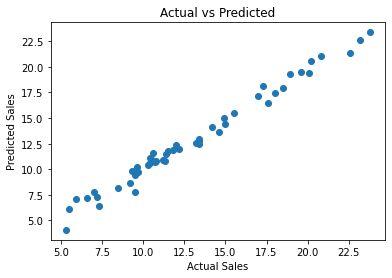

In [69]:
plt.scatter(y_test,y_pred_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted")
plt.show()

### Model Saving

In [70]:
filename = 'ads.pkl'
pickle.dump(lr,open(filename,'wb'))